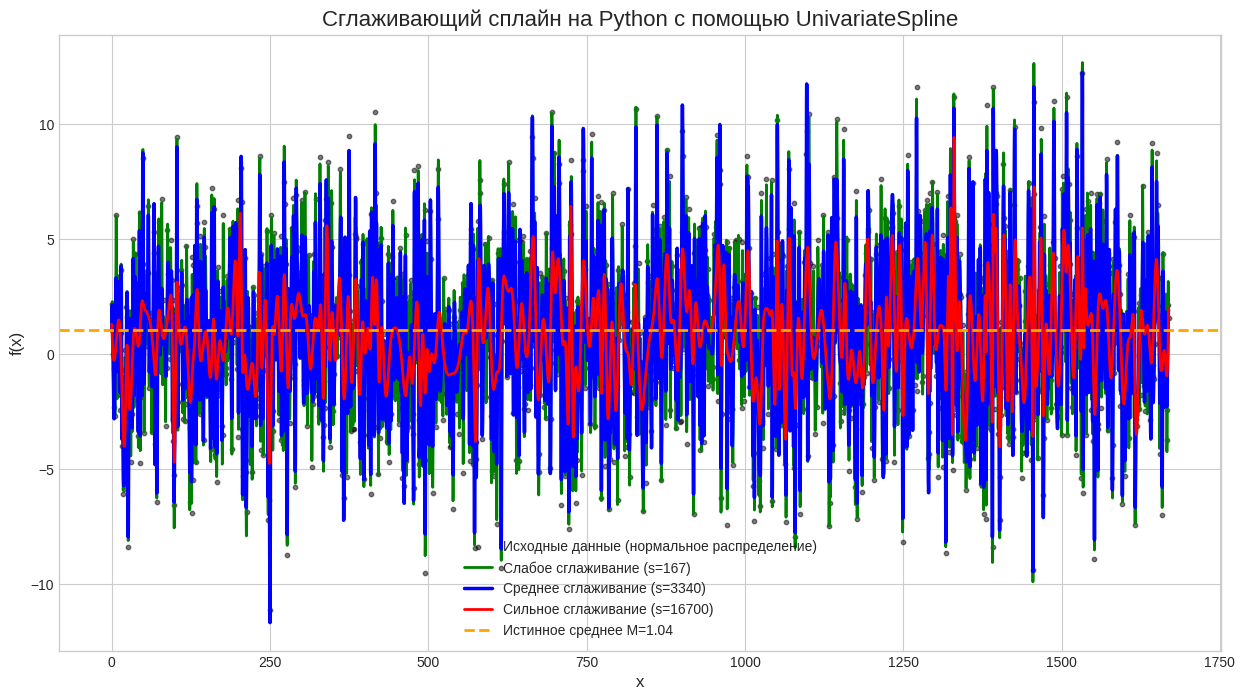

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

N = 1670 
M = 1.04      
SIGMA = 3.74  

# генератор случайных чисел
rng = np.random.default_rng(seed=7)

x = np.arange(N)
y = rng.normal(loc=M, scale=SIGMA, size=N)


# 2. Построение сглаживающих сплайнов
# Ключевой параметр в UnivariateSpline - это 's', коэффициент сглаживания.
# Он аналог (1-p)/p
# - s = 0: Сплайн будет интерполяционным (пройдет через все точки).
# - s > 0: Сплайн будет сглаживающим. Чем больше s, тем сильнее сглаживание.
# Если s=None (по умолчанию), SciPy пытается подобрать оптимальное значение автоматически.

# Попробуем три разных степени сглаживания
s_low = N * 0.1  # Слабое сглаживание
s_medium = N * 2 # Среднее сглаживание
s_high = N * 10  # Сильное сглаживание

spline_low = UnivariateSpline(x, y, s=s_low)
spline_medium = UnivariateSpline(x, y, s=s_medium)
spline_high = UnivariateSpline(x, y, s=s_high)

x_smooth = np.linspace(0, N - 1, N * 5)

# Вычисляем значения сплайнов на новой сетке
y_smooth_low = spline_low(x_smooth)
y_smooth_medium = spline_medium(x_smooth)
y_smooth_high = spline_high(x_smooth)

# 3. Визуализация результатов
plt.figure(figsize=(15, 8))

plt.scatter(x, y, s=10, alpha=0.5,marker='o', label='Исходные данные (нормальное распределение)', color='black')
plt.plot(x_smooth, y_smooth_low, label=f'Слабое сглаживание (s={s_low:.0f})', color='green', linewidth=2)
plt.plot(x_smooth, y_smooth_medium, label=f'Среднее сглаживание (s={s_medium:.0f})', color='blue', linewidth=2.5)
plt.plot(x_smooth, y_smooth_high, label=f'Сильное сглаживание (s={s_high:.0f})', color='red', linewidth=2)
plt.axhline(y=M, color='orange', linestyle='--', linewidth=2, label=f'Истинное среднее M={M}')
plt.title('Сглаживающий сплайн на Python с помощью UnivariateSpline', fontsize=16)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()